In [1]:
import csv
from miniml.helper import *
from miniml.perceptron import *

# 2 Classes

## dataset 1 - augmented

In [2]:
data = []
labels = []
with open('./datasets/synthetic1_train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        p1, p2, label = row[0].split(',')
        p1, p2, label = float(p1), float(p2), int(label)-1
        data.append([1, p1, p2+5]) # augmented data
        labels.append(label)

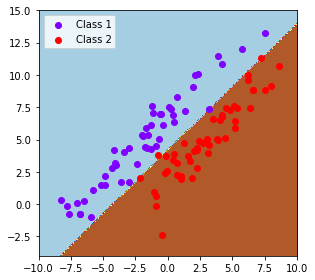

In [3]:
perceptron = Perceptron(data, labels)
perceptron.fit(iters=10000, kernel='linear')

plotBoundByDecisionFunction(perceptron.data, perceptron.labels, perceptron.predict, augmented=True)

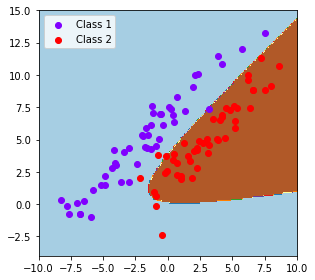

In [4]:
perceptron.fit(iters=10000, kernel='quadratic')

plotBoundByDecisionFunction(perceptron.data, perceptron.labels, perceptron.predict, augmented=True)

## dataset 2 - augmented

In [5]:
u = []
z = []
with open('./XOR.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in list(spamreader)[1:]:
        x0, x1, label = map(float, row[0].split(','))
        u.append([1, x0, x1])
        z.append(int(label)-1)

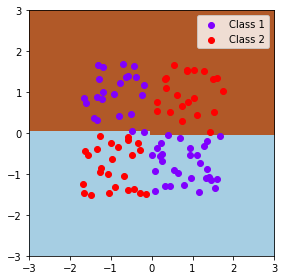

In [6]:
perceptron = Perceptron(u, z)
perceptron.fit(iters=10000, kernel='linear')

plotBoundByDecisionFunction(perceptron.data, perceptron.labels, perceptron.predict, augmented=True)

Data is linearly separable


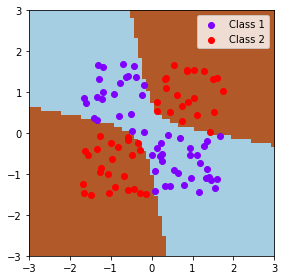

In [7]:
perceptron.fit(iters=10000, kernel='quadratic')

plotBoundByDecisionFunction(perceptron.data, perceptron.labels, perceptron.predict, augmented=True)

# Multi-Classes - augmented

**MVM (Maximum Value Method)**

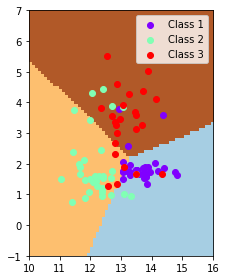

In [8]:
data = []
labels = []
with open('./datasets/wine_train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        xy = row[0].split(',')
        x1, x2, label = float(xy[0]), float(xy[1]), int(xy[-1])
        data.append([1, x1, x2]) # augmented
        labels.append(label)
data = np.array(data)
labels = np.array(labels)

# for class 1
label1 = np.copy(labels)
label1[labels==1] = 0
label1[labels!=1] = 1
perceptron1 = Perceptron(data, label1)
rets = perceptron1.fit(iters=100000, kernel='linear', GD='SGD')

# for class 2
label2 = np.copy(labels)
label2[labels==2] = 0
label2[labels!=2] = 1
perceptron2 = Perceptron(data, label2)
perceptron2.fit(iters=100000, kernel='linear', GD='SGD')

# for class 3
label3 = np.copy(labels)
label3[labels==3] = 0
label3[labels!=3] = 1
perceptron3 = Perceptron(data, label3)
perceptron3.fit(iters=100000, kernel='linear', GD='SGD')

# only for linear case
def predict(x):
    x = np.insert(x, 0, [1 for _ in range(len(x))], axis=1) # augmented notation
    
    pred1 = np.matmul(x, perceptron1.w).reshape(-1,1)
    pred2 = np.matmul(x, perceptron2.w).reshape(-1,1)
    pred3 = np.matmul(x, perceptron3.w).reshape(-1,1)
    
    pred = np.hstack([pred1, pred2, pred3])
    return np.argmax(pred, axis=1)

plotBoundByDecisionFunction(data, labels-1, predict, augmented=True)

Loss of perceptron1

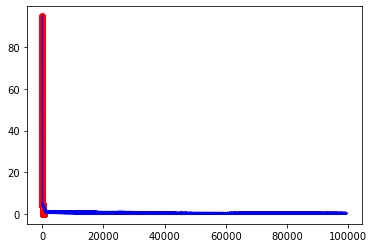

In [9]:
loss = np.array(rets[1])
light = np.array(rets[2])

_ = plt.plot(range(len(loss[light==0])), loss[light==0], color='b')
_ = plt.scatter(range(len(loss[light==1])), loss[light==1], color='r')